In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
rng = np.random.default_rng(7)

In [23]:
def geralinear(n=200):
  mean0= np.array([-1.2, -1.0])
  mean1= np.array([1.1, 1.0])
  X0 = rng.normal(mean0, [0.6,0.6], size=(n, 2))
  X1 = rng.normal(mean1, [0.6,0.6], size=(n, 2))

  X = np.vstack((X0, X1))

  y = np.concatenate((np.zeros(n), np.ones(n)))
  return X, y


In [24]:
x,y=geralinear(3)

print(x)
print(y)

[[-1.19926191 -0.82075268]
 [-1.36448271 -1.5343551 ]
 [-1.47280247 -1.59498793]
 [ 1.13608616  1.80412915]
 [ 0.80467609  0.62771506]
 [ 1.39390523  1.2141322 ]]
[0. 0. 0. 1. 1. 1.]


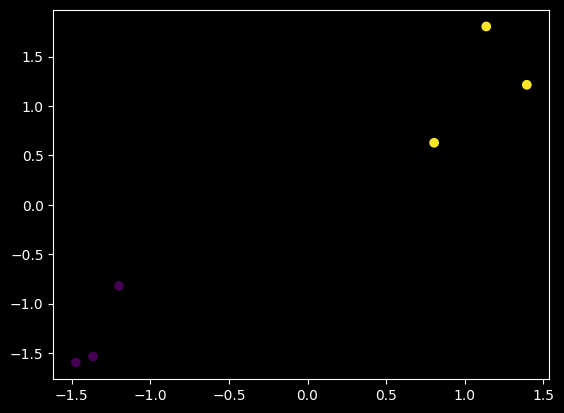

In [25]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [32]:
def designmatrix(X, grau):
  X = np.asarray(X, float)
  x1 = X[:,0:1]
  x2 = X[:, 1:1+1]
  cols = [np.ones((X.shape[0],1))]
  for i in range(grau+1):
    for j in range(grau+1-i):
      if i==0 and j==0:
        continue
      cols.append(x1**i * x2**j)
  return np.hstack(cols)



In [33]:
designmatrix(x, 3)


array([[ 1.        , -0.82075268,  0.67363496, -0.5528877 , -1.19926191,
         0.98429742, -0.80786474,  1.43822912, -1.1804304 , -1.7248134 ],
       [ 1.        , -1.5343551 ,  2.35424558, -3.61224872, -1.36448271,
         2.09360101, -3.2123274 ,  1.86181307, -2.85668239, -2.54041176],
       [ 1.        , -1.59498793,  2.54398651, -4.05762778, -1.47280247,
         2.34910217, -3.74678961,  2.16914712, -3.45976348, -3.19472524],
       [ 1.        ,  1.80412915,  3.25488198,  5.87222745,  1.13608616,
         2.04964616,  3.69782638,  1.29069177,  2.32857464,  1.46633705],
       [ 1.        ,  0.62771506,  0.3940262 ,  0.24733618,  0.80467609,
         0.5051073 ,  0.31706346,  0.64750361,  0.40644777,  0.52103067],
       [ 1.        ,  1.2141322 ,  1.47411701,  1.78977294,  1.39390523,
         1.69238523,  2.05477941,  1.94297179,  2.35902462,  2.70831854]])

In [ ]:
def traintestsplit(X, y, test_size=0.20, seed=7):
  n= len(y)
  idx0 = np.where(y==0)[0]
  idx1 = np.where(y==1)[0]
  rng.shuffle(idx0)
  rng.shuffle(idx1)
  n0_te = int(round(test_size* len(idx0)))
  n1_te = int(round(test_size* len(idx1)))
  te_idx = np.concatenate((idx0[:n0_te], idx1[:n1_te]))
  tr_idx = np.concatenate((idx0[n0_te:], idx1[n1_te:]))

  rng.shuffle(te_idx)
  rng.shuffle(tr_idx)

  return X[tr_idx], X[te_idx], y[tr_idx], y[te_idx]



In [ ]:
x,y = geralinear(n=10)
X_train, X_test, y_train, y_test = traintestsplit(x,y)

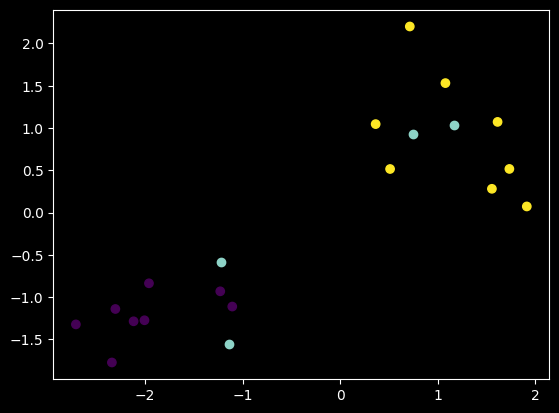

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1])
plt.show()